## Setup

In [1]:
# This project needs python 3.7+ and sklearn >=1.0.1
import sys
assert sys.version_info >=(3,7)

In [2]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >=version.parse("1.0.1")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
from pathlib import Path

In [6]:
IMG_PATH= Path()/"images"/"svm"
IMG_PATH.mkdir(exist_ok=True, parents=True )
def save_fig(plot_name, resolution=300, file_extension='png',tight_layout=True):
    img_detail = IMG_PATH /f"{plot_name}.{file_extension}"
    if tight_layout:
        plt.tight_layout()
    print(f'Saving {plot_name}...')
    plt.savefig(img_detail, dpi=resolution, format=file_extension)


## Linear SVM Classification


In [7]:
from sklearn import datasets
from sklearn.svm import SVC

In [8]:
iris =datasets.load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [9]:
X = iris.data[['petal length (cm)',  'petal width (cm)']].values
y= iris.target
setosa_or_versicolor = (y==0)|(y==1)
X= X[setosa_or_versicolor]
y= y[setosa_or_versicolor]

In [10]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [11]:
svm =SVC(kernel='linear', C= float("inf"))
svm.fit(X,y)

SVC(C=inf, kernel='linear')

In [12]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    #at the decision bounday w0x0 + w1x1 + b = 0
    # =>x1 = -(w0x0+b)/w1 
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1]*x0 -b/w[1]
    
    margin = 1/ w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svc = svm_clf.support_vectors_
    
    plt.plot(x0, decision_boundary,'k-', linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up,'k--', linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down,'k--', linewidth=2, zorder=-2)
    plt.scatter(svc[:,0], svc[:,1], s=180, facecolors='#AAA',
                zorder=-1)

Saving large_margin_classification_plot...


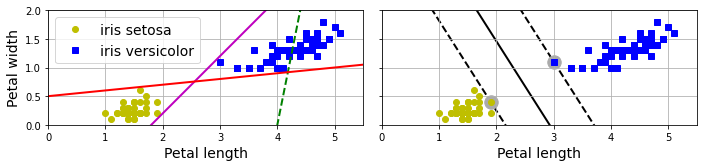

In [13]:
fig, axes = plt.subplots(ncols=2,figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[y==0,0], X[y==0,1],'yo', label="iris setosa")
plt.plot(X[y==1,0], X[y==1,1],'bs', label="iris versicolor")
plt.plot(x0, pred_1,"g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-",linewidth=2)
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()

plt.sca(axes[1])
plt.plot(X[y==0,0], X[y==0,1],'yo', label="iris setosa")
plt.plot(X[y==1,0], X[y==1,1],'bs', label="iris versicolor")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2])
plt.gca().set_aspect("equal")
plot_svc_decision_boundary(svm, 0,5.5)
plt.grid()

save_fig("large_margin_classification_plot")
plt.show()

In [14]:
# compare w/ scaled features
from sklearn.preprocessing import StandardScaler

Saving sensitivity_to_feature_scales_plot...


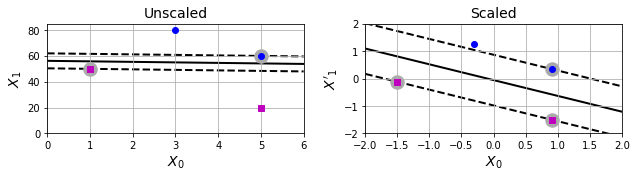

In [15]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

std_scaler = StandardScaler()
Xs_scaled = std_scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(Xs_scaled,ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel(f"$X_0$")
plt.ylabel(f"$X_1$")
plt.title("Unscaled")
plt.axis([0,6, 0, 85])
plt.grid()

plt.subplot(122)
plt.plot(Xs_scaled[:,0][ys==1], Xs_scaled[:,1][ys==1], "bo")
plt.plot(Xs_scaled[ys==0, 0], Xs_scaled[ys==0, 1], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2,2)
plt.xlabel(f"$X_0$")
plt.ylabel(f"$X'_1$")
plt.axis([-2, 2, -2, 2])
plt.title("Scaled")
plt.grid()
save_fig("sensitivity_to_feature_scales_plot")
plt.show()

## Soft Margin Classification

In [16]:
x_outlier = np.array([[3.4,1.3], [3.2, 0.8]])
y_outlier =np.array([0,0])
Xo1 = np.concatenate([X,x_outlier[:1]], axis=0)
yo1 = np.concatenate([y,y_outlier[:1]], axis=0)
Xo2 = np.concatenate([X,x_outlier[1:]], axis=0)
yo2 = np.concatenate([y,y_outlier[1:]], axis=0)

In [17]:
svm_clf2 = SVC(kernel="linear", C= 10**9)
svm_clf2.fit(Xo2, yo2)

SVC(C=1000000000, kernel='linear')

Saving hard_margin_sensitivity_to_outliers_plot...


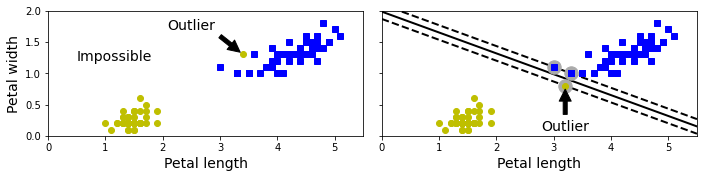

In [18]:
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(10, 2.7))
plt.sca(axes[0])
plt.plot(Xo1[yo1==1, 0],Xo1[yo1==1, 1],"bs")
plt.plot(Xo1[yo1==0, 0],Xo1[yo1==0, 1],"yo")
plt.axis([0, 5.5, 0, 2])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.text(0.5,1.2, "Impossible")
plt.annotate(text="Outlier",xy=[x_outlier[0,0],x_outlier[0,1]],
            xytext=(2.5, 1.7),
            ha='center',
#             arrowprops={facecolor:'black', shrink:0.1}
            arrowprops= dict(facecolor='black', shrink=0.1),
            )
plt.sca(axes[1])
plt.plot(Xo2[yo2==1, 0],Xo2[yo2==1, 1],"bs")
plt.plot(Xo2[yo2==0, 0],Xo2[yo2==0, 1],"yo")
plt.axis([0, 5.5, 0, 2])
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.annotate(text="Outlier", xy=[x_outlier[1,0], x_outlier[1,1]],
            xytext=(3.2, 0.08),
            ha='center',
            arrowprops= dict(facecolor='black', shrink=0.1))
plt.xlabel("Petal length")
save_fig("hard_margin_sensitivity_to_outliers_plot")
plt.show()

In [19]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [20]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y= (iris.target==2) # Iris virginica

pipe = make_pipeline(StandardScaler(),
                    LinearSVC(loss='hinge', C=1,random_state=42))
pipe.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [21]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
pipe.predict(X_new)

array([ True, False])

In [22]:
pipe.decision_function(X_new)

array([ 0.68560988, -0.40718623])

In [23]:
# compare the differences of C values
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, random_state=42)
svm_clf100 = LinearSVC(C=100, max_iter=10_000, random_state=42)
scaled_svm_clf1 = make_pipeline(scaler, svm_clf1 )
scaled_svm_clf100 = make_pipeline(scaler, svm_clf100 )
scaled_svm_clf1.fit(X, y)
scaled_svm_clf100.fit(X, y)

# for there is no support_vectors_ in linearSVC, we need to calculate manually
## first we need convert to unscaled parameters
b1= svm_clf1.decision_function([-scaler.mean_/scaler.scale_])
b100= svm_clf100.decision_function([-scaler.mean_/scaler.scale_])
w1 = svm_clf1.coef_[0]/scaler.scale_
w100 = svm_clf100.coef_[0]/scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf100.intercept_ =  np.array([b100])
svm_clf1.coef_ = np.array([w1])
svm_clf100.coef_ = np.array([w100])

## find support vectors
t = y*2-1
support_vector_idx1 = ((t*(X.dot(w1) +b1))<1).ravel()
support_vector_idx100 = ((t*(X.dot(w100) +b100))<1).ravel()
svm_clf1.support_vectors_ = X[support_vector_idx1]
svm_clf100.support_vectors_ = X[support_vector_idx100]

Saving regularization_plot...


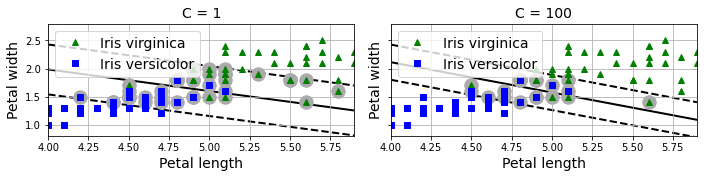

In [24]:
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(10, 2.7))
plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"C = {svm_clf1.C}")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf100, 4, 5.9)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"C = {svm_clf100.C}")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

save_fig("regularization_plot")
plt.show()

## Nonlinear SVM Classification

### Adding features(e.g. polynomial features) to make a dataset linearly separable

Saving higher_dimensions_plot...


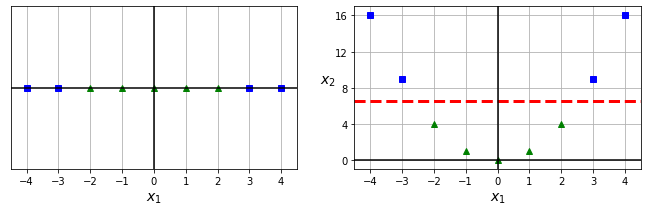

In [25]:
X1D = np.linspace(-4,4, 9).reshape(-1,1)
X2D = np.c_[X1D, X1D**2]
y=np.array([0,0,1,1,1,1,1,0,0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.plot(X1D[y==0,0],np.zeros(4),'bs')
plt.plot(X1D[y==1,0],np.zeros(5),'g^')
plt.axhline(y=0, c='k')
plt.axvline(x=0, c='k')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.plot(X2D[y==0,0],X2D[y==0,1],'bs')
plt.plot(X2D[y==1,0],X2D[y==1,1],'g^')
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axvline(x=0, c='k')
plt.axhline(y=0, color='k')
plt.gca().get_yaxis().set_ticks([0,4,8,12,16])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.axis([-4.5, 4.5, -1, 17])

save_fig("higher_dimensions_plot", tight_layout=False)
plt.subplots_adjust(right=1)

In [26]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [27]:
X,y =make_moons(noise=0.15, n_samples=100, random_state=42)
polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=3),
                                   StandardScaler(),
                                   LinearSVC(C=10, loss='hinge',max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, loss='hinge', max_iter=10000,
                           random_state=42))])

In [28]:
def plot_datasets(X,y, axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'bs')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)  
    
    
def plot_predictions(clf, axes):
    xs= np.linspace(axes[0],axes[1],100)
    ys= np.linspace(axes[2],axes[3],100)
    x,y = np.meshgrid(xs,ys)
    x_new = np.c_[x.ravel(),y.ravel()]
    y_pred = clf.predict(x_new).reshape(x.shape)
    y_prob = clf.decision_function(x_new).reshape(x.shape)
    plt.contourf(xs, ys,y_pred,cmap=plt.cm.brg, alpha=0.3)
    plt.contourf(xs, ys,y_prob,cmap=plt.cm.brg, alpha=0.1)


Saving moons_polynomial_svc_plot...


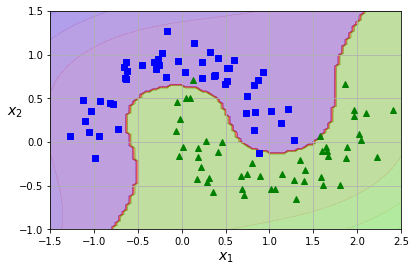

In [29]:
axes = [-1.5, 2.5, -1, 1.5]
plot_datasets(X,y,axes)
plot_predictions(polynomial_svm_clf, axes)
save_fig("moons_polynomial_svc_plot")
plt.show()

### Polynomial Kernel

In [30]:
from sklearn.svm import SVC

In [31]:
poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel='poly', degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [32]:
poly100_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel='poly', degree=10, coef0=100, C=5))
poly100_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Saving moons_kernelized_polynomial_svc_plot...


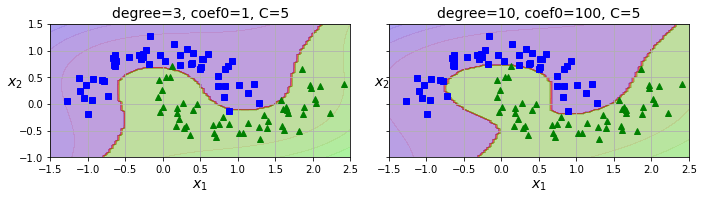

In [33]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 3))
plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, axes=[-1.5, 2.5, -1, 1.5])
plot_datasets(X,y,axes=[-1.5, 2.5, -1, 1.5])
plt.title(f"degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, axes=[-1.5, 2.5, -1, 1.5])
plot_datasets(X,y,axes=[-1.5, 2.5, -1, 1.5])
plt.title(f"degree=10, coef0=100, C=5")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

### similarity features

In [34]:
# Similarity features using the Gaussian RBF
def gaussian_rbf(x, landmark, gamma=0.3):
    return np.exp(-gamma*np.linalg.norm(x-landmark, axis=1)**2)

Saving kernel_method_plot...


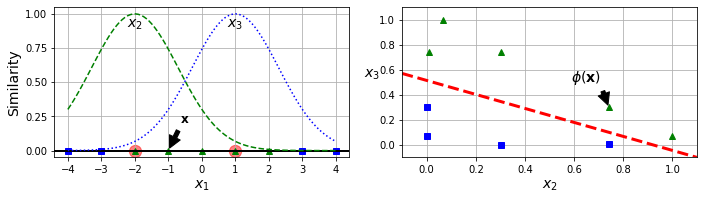

In [35]:
X1D = np.linspace(-4,4, 9).reshape(-1,1)
y=np.array([0,0,1,1,1,1,1,0,0])
x1s = np.linspace(-4,4,100).reshape(-1,1)
x2s = gaussian_rbf(x1s, -2)
x3s = gaussian_rbf(x1s, 1)


plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.plot(X1D[y==0,0],np.zeros(4),'bs')
plt.plot(X1D[y==1,0],np.zeros(5),'g^')
plt.axhline(y=0, c='k', linewidth=2)
plt.scatter([-2,1],[0,0], s=150,alpha=0.5, c="red" )
plt.plot(x1s,x2s, 'g--')
plt.plot(x1s,x3s, 'b:')
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.text(-2, 0.9, "$x_2$",ha='center', fontsize=14)
plt.text(1, 0.9, "$x_3$",ha='center', fontsize=14)
plt.annotate(r'$\mathbf{x}$',
            xy= [X1D[3,0],0],
            xytext=(-0.5, 0.20),
             ha="center",
            arrowprops=dict(facecolor='black', shrink=0.1),
            fontsize=12)

XK = np.c_[gaussian_rbf(X1D, -2), gaussian_rbf(X1D, 1)]
yk = np.array([0,0,1,1,1,1,1,0,0])


plt.subplot(122)
plt.grid()
plt.plot(XK[:,0][yk==0],XK[:,1][yk==0],"bs")
plt.plot(XK[:,0][yk==1],XK[:,1][yk==1],"g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
            xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
            arrowprops=dict(facecolor='black', shrink=0.1))
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
save_fig("kernel_method_plot")
plt.show()

### Gaussian RBF Kernel

In [36]:
X,y =make_moons(noise=0.15, n_samples=100, random_state=42)

In [37]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                              SVC(kernel="rbf",
                                  gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

In [38]:
from sklearn.svm import  SVC

Saving moons_rbf_svc_plot...


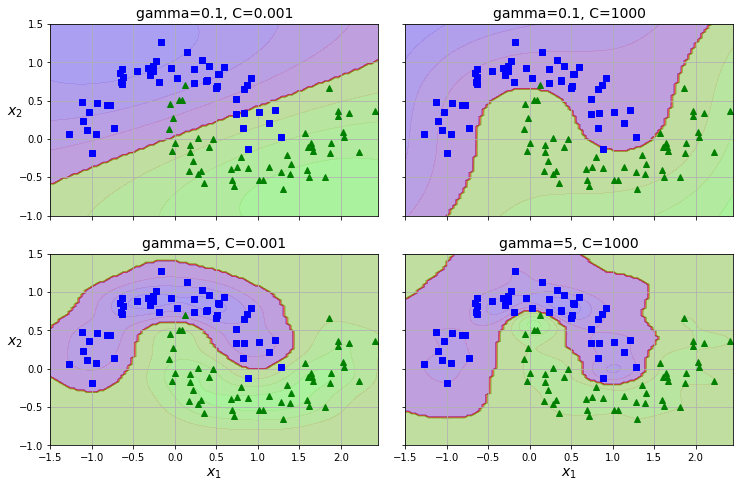

In [39]:
C1, C2 = 0.001, 1000
gamma1,gamma2 = 0.1, 5
hyper_parameter = [(gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)]
svm_clfs = []

for gamma, C in hyper_parameter:
    rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                       SVC(kernel="rbf",
                                           gamma=gamma, C=C))
    rbf_kernel_svm_clf.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf)
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)
for i,svm_clf_var in enumerate(svm_clfs):
    plt.sca(axes[i//2, i%2])
    plot_predictions(svm_clf_var, [-1.5, 2.45, -1, 1.5])
    plot_datasets(X,y, [-1.5, 2.45, -1, 1.5])
    gamma, C =hyper_parameter[i]
    plt.title(f"gamma={gamma}, C={C}")
    
    if i in(0,1):
        plt.xlabel("")
    if i in (1,3):
        plt.ylabel("")
        
save_fig("moons_rbf_svc_plot")
plt.show()

## SVM Regression

In [40]:
from sklearn.svm import LinearSVR

In [41]:
np.random.seed(42)
X= 2*np.random.rand(50,1)
y= 4 + 3*X[:,0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                       LinearSVR(epsilon=0.5, random_state=42))
svm_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [42]:
def find_support_vectors(svm_reg, X,y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y- y_pred) >= epsilon
    return np.argwhere(off_margin)

In [43]:
def plot_svm_regression(svm_reg, X, y, axes):
    xls = np.linspace(axes[0], axes[1],100).reshape(100, 1)
    y_pred = svm_reg.predict(xls)
    epsilon = svm_reg[-1].epsilon
    plt.plot(xls, y_pred, 'k-',linewidth=2, label=r'$\hat{y}$', zorder = -2)
    plt.plot(xls, y_pred+epsilon, 'k--', linewidth=2, zorder = -2)
    plt.plot(xls, y_pred-epsilon, 'k--', linewidth=2, zorder = -2)
    plt.plot(X, y, 'bo')
    plt.scatter(X[svm_reg._support], y[svm_reg._support],
               s=180, facecolors='#AAA', zorder=-1)
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

In [44]:
svm_reg2 = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=1.2, random_state =42))
svm_reg2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=1.2, random_state=42))])

Saving svm_regression_plot...


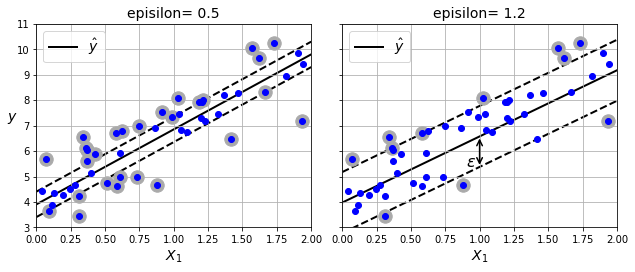

In [45]:
figure, axes =plt.subplots(ncols=2, figsize=(9,4), sharey = True)
svm_reg._support = find_support_vectors(svm_reg, X,y)
svm_reg2._support =  find_support_vectors(svm_reg2, X, y)

plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0,2, 3, 11])
plt.title(f'episilon= {svm_reg[-1].epsilon}')
plt.xlabel(f'$X_1$')
plt.ylabel(f'$y$',rotation=0)
plt.grid()

plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0,2, 3, 11])
plt.title(f'episilon= {svm_reg2[-1].epsilon}')
plt.xlabel(f'$X_1$')
plt.grid()

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])
plt.annotate(
    "", xy=(eps_x1, eps_y_pred), xycoords='data',
    xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
    textcoords='data',arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
)
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)


save_fig("svm_regression_plot")
plt.show()

### SVM Regression using a second-degree polynomial kernel

In [46]:
from sklearn.svm import SVR 

In [47]:
np.random.seed(42)
X = 2* np.random.rand(50, 1) -1
y = 0.2 + 0.1 * X[:,0] + 0.5*X[:,0]**2 + np.random.rand(50)/10
svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
                            )
svm_poly_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, degree=2, kernel='poly'))])

In [48]:
svm_poly_reg2 = make_pipeline(StandardScaler(),
                             SVR(kernel='poly', degree=2, C=0.01, epsilon=0.1)
                            )
svm_poly_reg2.fit(X,y)

svm_poly_reg._support = find_support_vectors(svm_poly_reg, X,y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X,y)


Saving svm_with_polynomial_kernel_plot...


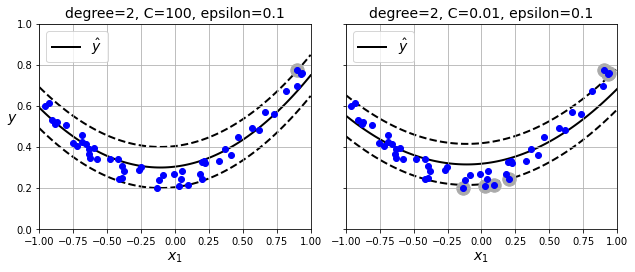

In [49]:
figure, axes = plt.subplots(ncols=2, sharey=True, figsize=(9,4))
plt.sca(axes[0])

plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f'degree={svm_poly_reg[-1].degree}, C={svm_poly_reg[-1].C}, epsilon={svm_poly_reg[-1].epsilon}')
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])

plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f'degree={svm_poly_reg2[-1].degree}, C={svm_poly_reg2[-1].C}, epsilon={svm_poly_reg2[-1].epsilon}')
plt.grid()
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

In [50]:
svm_poly_reg[-1].degree

2

## Comparing LinearSVC, SVC with the linear kernel and SGDClassifier

In [56]:
# Let's use the iris dataset: the setosa and iris veriscolor
iris = datasets.load_iris(as_frame=True)
X =iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target


setosa_or_veriscolor = (y==0) |(y==1)
X= X[setosa_or_veriscolor]
y= y[setosa_or_versicolor]

Since we want the models to produce similar results, we need to  
* update the default value of loss in LinearSVC = 'hinge' instead of squared_hinge
* Also, for svc, we choose 'linear' as kernel value instead of 'RBF'
* lastly, SGDClassifier does not have a C hyperparameter, but it has `alpha`, so we will tweak it to get similar results

In [52]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler

In [57]:
C = 5
alpha =0.05

scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)


lin_clf = LinearSVC(loss='hinge', C=C, random_state=42 ).fit(X_scaled, y)
svc_clf = SVC(kernel='linear', C=C).fit(X_scaled,y)
sgd_clf = SGDClassifier(alpha=alpha, random_state= 42).fit(X_scaled,y)

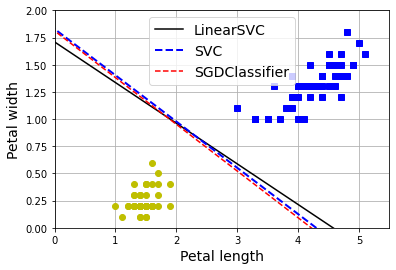

In [69]:
# plot the dicision boundary of these three models
def computer_decision_boundary(model):
    w = -model.coef_[0,0]/model.coef_[0,1]  #coef length /coef width kind of normalize
    b = -model.intercept_[0] /model.coef_[0,1]
    return scaler.inverse_transform([[-10, -10*w+b], [10, 10*w+b]])
    
lin_line = computer_decision_boundary(lin_clf)
svc_line = computer_decision_boundary(svc_clf)
sgd_line = computer_decision_boundary(sgd_clf)

plt.plot(lin_line[:,0], lin_line[:,1], "k", label ='LinearSVC')
plt.plot(svc_line[:,0], svc_line[:,1], "b--",linewidth=2, label ='SVC')
plt.plot(sgd_line[:,0], sgd_line[:,1], "r--", label ='SGDClassifier')
plt.plot(X[:,0][y==1], X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0], X[:,1][y==0],'yo')
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

## SVM on California housing dataset

Since there are over 20,000 instances, SVMs can be slow. so for hyperparameter tuning you should use much less  instances (e.g. 2,000) to test many more hyperparameter combinations.

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR

In [4]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
lin_svr = make_pipeline(
    StandardScaler(),
    LinearSVR(random_state=42)
)
lin_svr.fit(X_train,y_train)

C:\工作 (2022-08-19)\Haipeng\01_ML\02_workfield\my_env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(random_state=42))])

In [12]:
# since it does not coverge, we need to increase max_iter:
lin_svr = make_pipeline(
    StandardScaler(),
    LinearSVR(random_state=42, max_iter=5000)
)
lin_svr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(max_iter=5000, random_state=42))])

In [13]:
from sklearn.metrics import mean_squared_error

In [15]:
y_pred = lin_svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

0.9595484665813285

In [16]:
np.sqrt(mse)

0.979565447829459

In this dataset, the target represent hundreds and thousands of  dollars, so with this model we can expect close to $98,000! Let's try  RBF kernel. we will use random search with cross validation to find the appropriate hyperparameter values for `C` and `gamma`

In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform
import matplotlib.pyplot as plt

In [36]:
svm_clf= make_pipeline(StandardScaler(),
                      SVR())

param_distrib={
    'svr__gamma': loguniform(0.001, 0.1),
    'svr__C': uniform(1,10)
}

rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000027C246916A0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000027C26BE4CA0>},
                   random_state=42)

In [41]:
rnd_search_cv.best_params_

{'svr__C': 4.63629602379294, 'svr__gamma': 0.08781408196485974}

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train,
                scoring='neg_root_mean_squared_error')

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

In [44]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train)
mean_squared_error(y_train, y_pred)

0.3321706481730093

In [45]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
mean_squared_error(y_test, y_pred)

0.3427788989684868